# Model #3: Random layers won't do the job

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np # pip install numpy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, MaxPool2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import model_from_json

# 1.Load a dataset(sort of)

In [3]:
train_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/train")
test_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop//flavia_for_cnn/test")
val_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/val")


class_names = list([item.name for item in train_dir.glob('*')])
print("Classes:", class_names)


image_generator = ImageDataGenerator(rescale=1./255)

train_generator = image_generator.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      shuffle = False)

test_generator = image_generator.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)
val_generator = image_generator.flow_from_directory(val_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)

Classes: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
Found 523 images belonging to 12 classes.
Found 96 images belonging to 12 classes.
Found 88 images belonging to 12 classes.


# 2.Preprocess dataset

In [4]:
#done already

# 3.Build model

In [5]:
model = Sequential()



model.add(Conv2D(200, (3,3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))

model.add(Conv2D(200, (3,3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))

model.add(Conv2D(200, (3,3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))


model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(12))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 200)     360200    
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 200)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 200)     360200    
_________________________________________________________________
activation_2 (Activation)    (None, 144, 144, 200)     0         
_________________________________________________________________
dropout (Dropout)            (None, 144, 144, 200)     0

# 4.Plot the model as a graph

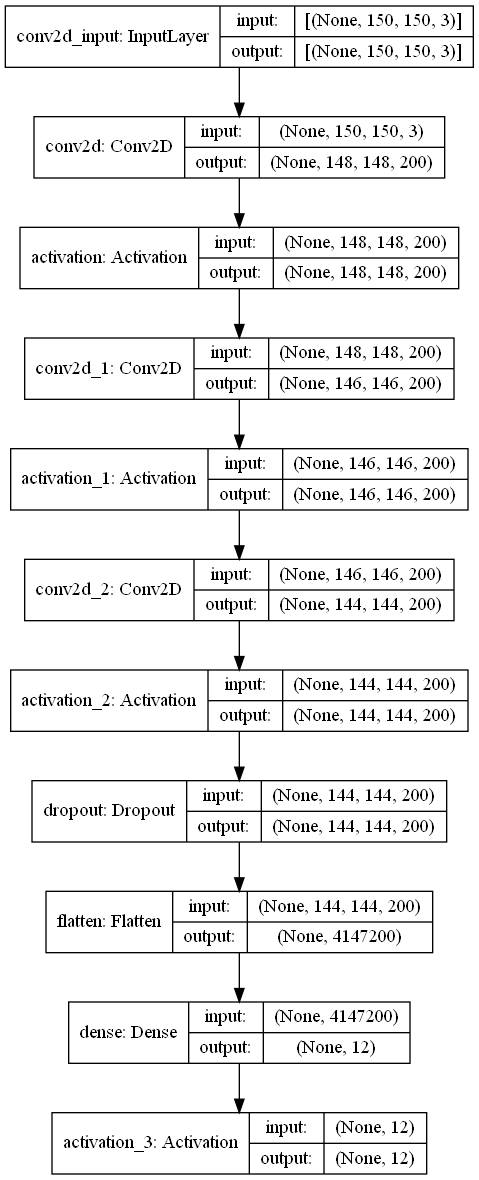

In [6]:
tf.keras.utils.plot_model(model, to_file='file.png', show_shapes=True)
#pip install pydot

# 5.Compile the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6.Fit your model


In [8]:
trained = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data=val_generator
                    );


Epoch 1/10
66/66 [==============================] - 268s 4s/step - loss: 12.0227 - accuracy: 0.0612 - val_loss: 2.4850 - val_accuracy: 0.0909
Epoch 2/10
66/66 [==============================] - 179s 3s/step - loss: 2.4854 - accuracy: 0.0554 - val_loss: 2.4848 - val_accuracy: 0.0909
Epoch 3/10
66/66 [==============================] - 233s 4s/step - loss: 2.4850 - accuracy: 0.0631 - val_loss: 2.4845 - val_accuracy: 0.0909
Epoch 4/10
66/66 [==============================] - 275s 4s/step - loss: 2.4843 - accuracy: 0.1090 - val_loss: 2.4845 - val_accuracy: 0.0909
Epoch 5/10
66/66 [==============================] - 181s 3s/step - loss: 2.4840 - accuracy: 0.1090 - val_loss: 2.4843 - val_accuracy: 0.0909
Epoch 6/10
66/66 [==============================] - 181s 3s/step - loss: 2.4836 - accuracy: 0.1090 - val_loss: 2.4841 - val_accuracy: 0.0909
Epoch 7/10
66/66 [==============================] - 183s 3s/step - loss: 2.4835 - accuracy: 0.0937 - val_loss: 2.4839 - val_accuracy: 0.0909
Epoch 8/10
6

# Save the model

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('weights3.h5')

# future usage:

# json_file = open('model3.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("weights3.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

# 7.Evaluate the model


In [13]:
loss,accuracy = model.evaluate(test_generator)


print(loss)
print(accuracy)


12/12 [==============================] - 6s 518ms/step - loss: 2.4844 - accuracy: 0.0833
2.4843757152557373
0.0833333358168602


# 8.Make predictions

In [14]:
selected_img = r'C:\Users\aghen\OneDrive\Desktop/standardleaves/2.jpg'
img1 = image.load_img(selected_img, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
prediction1 = model.predict(x, batch_size=8)

target_classes = [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

print("Predicted class: " + str(target_classes[np.argmax(prediction1[0])]))

Predicted class: 5


# 9.Metrics

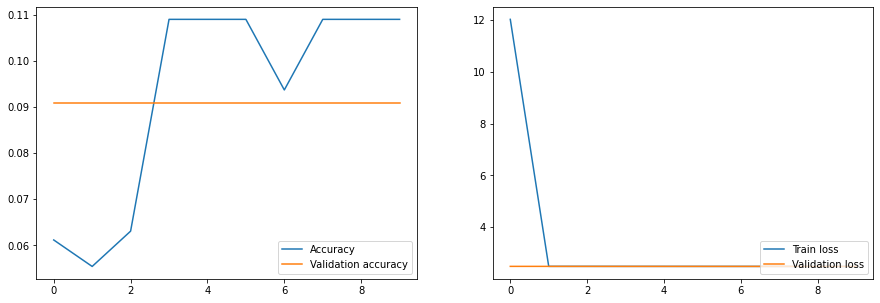

In [15]:
fig, sides = plt.subplots(1, 2, figsize=(15,5))

sides[0].plot(trained.history['accuracy'], label='Accuracy')
sides[0].plot(trained.history['val_accuracy'], label = 'Validation accuracy')
sides[0].legend(loc='lower right')


sides[1].plot(trained.epoch, trained.history["loss"], label="Train loss")
sides[1].plot(trained.epoch, trained.history["val_loss"], label="Validation loss")
sides[1].legend(loc='lower right')